# Hyperparameter tuning

Perform ```Hyperparameter tuning``` for the ```preprocessing``` step and ```machine learning classifier```

## General approach to Hyperparameter tuning

In [7]:
import sys
sys.path.append("../")

In [11]:
from titansurv.pipeline import pipeline1 as dp
from titansurv.utils import print_params

In [149]:
df = pd.read_csv('../data/raw/train.csv')
dfX = df.drop('Survived', axis=1)
dfy = df.Survived

In [150]:
dp.set_data(df)

## Let's see the description 

In [90]:
dp.get_description(markdown=True)

The following were the preprocessing steps used: 
1. **Embarked**: Dropped NA rows and applied OneHotEncoding
2. **Age** : Applied Mean Imputation and Mean Normalization
3. **Fare**: Mean Normalization
4. **Sex**: OneHotEncoding
5. **Name**: Categorised into ['Mr', 'Mrs', 'Miss', 'Master', 'Special']<br/> 
    5.1 Rename [Mlle, Ms] -> Miss      
    5.2 Rename [Mme] -> Mrs     
    5.3 Put the Rest -> Special     
    Then performed OneHotEncoding
6. **Ticket** categorized into [1: numeric, 0: else] <br/>
    6.1 Remove special characters but not space <br/>
    6.2 Replace numeric strings by 'numeric' <br/>
    6.3 Split on space and keep the first item <br/>
 Then applied binarizer for [1: numeric, 0: else]
7. **SibSp** binned into [0, 1, >1] and applied OneHotEncoding
8. **Parch** binned into [0, 1, >1] and applied OneHotEncoding

Tuned ML model: **RandomForestClassifier** using GridSearchCV

## Let's see what all we change in the ```preprocessing``` step

- [x] Can be readily implemented in current pipeline
- [ ] Can't be implemented easily in current pipeline


- [ ] Not Drop ```NA``` rows in ```Embarked``` , and ```Impute``` them
- [ ] Drop ```NA``` rows in ```Age```, and use ``NoImputation``
- [x] Type of imputation strategy for ```Age``` in ```SimpleImputer```, ```strategy=['mean', 'median']```, ```missing_indicator=[True, False]```
- [ ] Using other imputers like ```KNNImputer```, ```IterativeImputer```
- [x] Type of normalization strategy for ```Age``` and ```Fare```, i.e. ```StandardScaler```, ```MinMaxScaler```,
```MaxAbsScaler```
- [x] Categorisation of ```Name```, ```Ticket``` (by altering ```FunctionTransformer```)
- [x] Binning of ```SibSp```, ```Parch``` (by altering ```FunctionTransformer```) +  ```OneHotEncoder``` or ```LabelEncoder```
- [x] No Binning of ```SibSp```, ```Parch``` +  ```OneHotEncoder``` or ```LabelEncoder``` 
- [ ] Apply dimensionality reduction techniques like ```PCA```, ```LDA```, ```QDA``` maybe only on specific columns?
- [ ] Use Feature selection algorithms
- [ ] Use Feature Augmentation by using clustering methods like ```KMeans```
- 

### **Note**

- When applying ```OneHotEncoder``` check for parameter ```handle_unknown=['error', 'ignore']```



## ```preprocessing``` hyperparameters

In [86]:
print_params(dp)

['data',
 'description',
 'mlmodel',
 'prepare_data__memory',
 'prepare_data__steps',
 'prepare_data__verbose',
 'prepare_data__nan_drpr',
 'prepare_data__nan_drpr__key',
 'prepare_data',
 'preprocess_data',
 'ycol',
 'preprocessing',
 'train',
 'preprocessing__n_jobs',
 'preprocessing__remainder',
 'preprocessing__sparse_threshold',
 'preprocessing__transformer_weights',
 'preprocessing__transformers',
 'preprocessing__verbose',
 'preprocessing__enc',
 'preprocessing__imp_scaler',
 'preprocessing__scaler',
 'preprocessing__pre_Name',
 'preprocessing__pre_Cabin',
 'preprocessing__pre_Ticket',
 'preprocessing__Pre_SibSp',
 'preprocessing__Pre_Parch',
 'preprocessing__enc__categories',
 'preprocessing__enc__drop',
 'preprocessing__enc__dtype',
 'preprocessing__enc__handle_unknown',
 'preprocessing__enc__sparse',
 'preprocessing__imp_scaler__memory',
 'preprocessing__imp_scaler__steps',
 'preprocessing__imp_scaler__verbose',
 'preprocessing__imp_scaler__imp',
 'preprocessing__imp_scaler__

In [21]:
pg_preproc = {}

In [32]:
step = 'preprocessing' # just a shorthand s for step

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator
from copy import deepcopy

In [135]:
def gen_grid(temp_grid, step):
    temp_grid = deepcopy(temp_grid) # Do I need this
    
    est_key = [k for k in temp_grid.keys() if k.startswith('__')][0].replace('__', '')
    if step == '':
        main_key = est_key
    else:
        main_key = f'{step}__{est_key}'
        
    res = {}
    res[main_key] = temp_grid.pop(f'__{est_key}')
    res.update({f'{main_key}__{k}': v for k, v in temp_grid.items()})
    
    return res

In [63]:
d = {'__imp': [SimpleImputer()] , 'strategy': ['mean', 'median']}

In [64]:
gen_grid(d, step='preprocessing')

{'preprocessing__imp': [SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                missing_values=nan, strategy='mean', verbose=0)],
 'preprocessing__imp__strategy': ['mean', 'median']}

In [66]:
# Type of imputation strategy for Age in SimpleImputer, 
# strategy=['mean', 'median'],  missing_indicator=[True, False]
# This is mergable with ALL
temp_preproc['SimpleImputer'] = {'__imp': [SimpleImputer()], 'strategy': ['mean', 'median']}
pg_preproc['SimpleImputer'] = gen_grid(temp_preproc['SimpleImputer'], step='preprocessing')



# Type of normalization strategy for Age i.e. StandardScaler, MinMaxScaler, MaxAbsScaler
# This is mergable with ALL
temp_preproc['StandardScaler__Age'] = {'__'}

## Let's see what all we change in the ```train``` mlmodel step

- [x] Apply various different classification algorithms directly first

In [217]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [198]:
from IPython.display import Image

## ```train``` mlmodel hyperparameters

In [ ]:
param_grid = {}

In [ ]:
classifiers = 

## ```LogisticRegression ```

    The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization
    with primal formulation, or no regularization. The 'liblinear' solver
    supports both L1 and L2 regularization, with a dual formulation only for
    the L2 penalty. The Elastic-Net regularization is only supported by the
    'saga' solver.
    
     - For small datasets, 'liblinear' is a good choice,

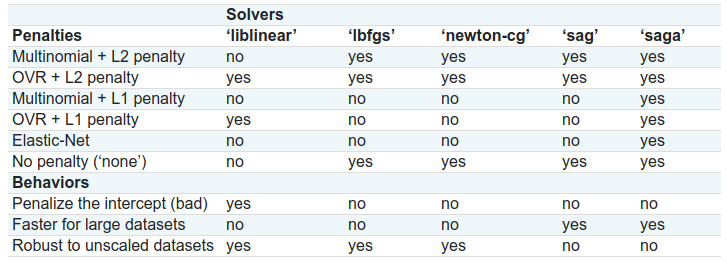

In [195]:
Image("../references/LogReg.png")

- `C` - Inverse of regularization strength 
    - Smaller value stronger regularization underfitting
    - Good Default range to try - [0.01, 0.1, 1, 10]
    - If features are highly correlated, try smaller values of ```C``` ?? (Really??)
- `penalty` - Norm of regularization i.e. penalize squared norm L2 or absolute value L1 of parameters or both
    - L1 will yield sparse solutions i.e. set certain parameters to zero and can also be used as 
    feature selection algorithm
    - choices - {None, 'l1', 'l2', 'elasticnet'}
    - None - no regularization
    - elasticnet - both l1 and l2 are applied and relative strength is compared by `l1_ratio`
        - `l1_ratio` - 1 is l1 (Lasso), and 0 is l2 (Ridge)
        
        $\min_{w} \frac{\mathcal{C}}{2N} \sum_{i=1}^{N} ||y - Xw ||^2_2 + 
 l_1 \text{ratio} ||w||_1 + 0.5 \times (1 - l_1 \text{ratio}) \times ||w||_2^2$
 
 <font color="red">**DOUBT**</font> : So do I need to specify `penalty` as l1 or l2 separately, or
 just setting the value of `l1_ratio` = 1 or 0 will do the trick?


        
- `class_weight` -  Weights associated with classes in the form {class_label: weight}
    
    - Default: None - all classes are supposed to have weight one.
    - 'balanced'- Automatically adjust based on observed frquencies



In [110]:
def get_logreg_solver(penalty):
    
    # Yes None can be a dictionary key
    # ref: t.ly/vZOv
    {None: None}
    
    pass

### Generate the param grid

In [147]:
temp_grid = {}

# No regularization
temp_grid['LogisticRegression_NoReg'] = {'__train': [LogisticRegression(max_iter=500)]}


# L1 and L2 regularization
# For small datasets, 'liblinear' is a good choice, 
# The 'liblinear' solver supports both L1 and L2 regularization
C = [0.01, 0.1, 1, 10, 100]
temp_grid['LogisticRegression_l1l2'] = {'__train': [LogisticRegression(max_iter=500)], 
                                        'penalty': ['l1', 'l2'], 'C': C, 
                                        'solver': ['liblinear']}

# ElasticNet regularization
temp_grid['LogisticRegression_elasnet'] = {'__train': [LogisticRegression(max_iter=500)],
                                           'penalty': ['elasticnet'], 'C': C, 'l1_ratio': [0, 0.4, 0.8, 1],
                                           'solver': ['saga']}


In [139]:
gen_grid(temp_grid['LogisticRegression_NoReg'], step='')

{'train': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=500,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)}

## ```RidgeClassifier```

This classifier first converts the target values into `{-1, 1}` and
then treats the problem as a regression task (multi-output regression in
the multiclass case).

    normalize : bool, default=False
        This parameter is ignored when ``fit_intercept`` is set to False.
        If True, the regressors X will be normalized before regression by
        subtracting the mean and dividing by the l2-norm.
        If you wish to standardize, please use
        :class:`sklearn.preprocessing.StandardScaler` before calling ``fit``
        on an estimator with ``normalize=False``.
        
**NOTE**- It is always advised to standardize before calling fit

[Stackoverflow - What does sklearn RidgeClassifier do?](https://stackoverflow.com/questions/53911663/what-does-sklearn-ridgeclassifier-do/53912015)

**[`RidgeClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html)** works differently compared to **[`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)** with l2 penalty. The loss function for `RidgeClassifier()` is not cross entropy. 

`RidgeClassifier()` uses [`Ridge()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) regression model in the following way to create a classifier:

Let us consider **binary classification** for simplicity.

1.  Generate a target variable with value as `+1` or `-1` based on the class in which it belongs to. 

2.  Build a `Ridge()` regression model (which is a regression model) to predict our target variable. The loss function is `RMSE + l2 penality`

3.  If the `Ridge()` regression's prediction value (calculated based on [**`decision_function()`**](https://github.com/scikit-learn/scikit-learn/blob/7389dbac82d362f296dc2746f10e43ffa1615660/sklearn/linear_model/base.py#L229) function) is greater than 0, then predict as positive class else negative class.

For **multi-class classification**:

1.  Use [**`LabelBinarizer()`**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html) to create a multi-output regression scenario, and then train independent `Ridge()` regression models, one for each class (One-Vs-Rest modelling). 

2.  Get prediction from each class's `Ridge()` regression model (a real number for each class) and then use `argmax` to predict the class.

 - `alpha` - Strength of regularization
     - higher value stronger regularization
     - good default values - [0.01, 0.1, 1, 10, 100]
     
 - `class_weight` -  Weights associated with classes in the form {class_label: weight}
    
    - Default: None - all classes are supposed to have weight one.
    - 'balanced'- Automatically adjust based on observed frquencies


### Generate param grid

In [148]:
alpha = [0.01, 0.1, 1, 10, 100]
temp_grid['RidgeClassifier'] = {'__train': [RidgeClassifier()], 'alpha': [0.01, 0.1, 1, 10, 100]}

## ```SVC``` - SupportVectorClassification

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`sklearn.svm.LinearSVC` or
:class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`sklearn.kernel_approximation.Nystroem` transformer.

- `C` - Inverse of regularization strength 
    - Smaller value stronger regularization
    - Good Default range to try - [0.01, 0.1, 1, 10, 100]
    - smaller value stronger regularization underfitting
        - so smaller `C` implies harder margin as we penalize highly any
        misclassified points in the margin
        - larger `C` implies soft-margin
        
- `kernel` - Specifies the kernel type to be used in the algorithm.
    - Default: 'rbf' - Choices ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'] or a callable
    - So you can pass your own kernel as well
    - linear is equivalent to `LinearSVC` but
        - `LinearSVC` is more efficient for large datasets
        
- `gamma` -  how far the influence of a single training example reaches,
    - with low values meaning ‘far’ and high values meaning ‘close’. 
    - inverse of the radius of influence of samples selected by the model as support vectors.
    - good default values: [0.001, 0.01, 0.1, 1, 10]
    - Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
    
- `class_weight` -  Weights associated with classes in the form {class_label: weight}
    
    - Default: None - all classes are supposed to have weight one.
    - 'balanced'- Automatically adjust based on observed frquencies

**NOTE:** 
- [RBF SVM parameters sklearn](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)
- [coef0 parameter in SVM](https://stackoverflow.com/questions/21390570/scikit-learn-svc-coef0-parameter-range)


[Why RandomizedSearch maybe useful](https://www.researchgate.net/post/Parameter_selection_for_RBF_and_polynomial_kernel_of_SVM-Is_the_best_c_Cost_parameter_the_same_for_both_kernels)

### Generate param grid

In [211]:
# linear kernel
temp_grid['SVC_linear'] = {'__train': SVC(), 'kernel': ['linear']}

C = [0.01, 0.1, 1, 10, 100]
gamma = [0.001, 0.01, 0.1, 1, 10]
# rbf
temp_grid['SVC_rbf'] = {'__train': SVC(), 'C': C, 'kernel': ['rbf'], 'gamma': gamma}

# poly
temp_grid['SVC_poly'] = {'__train': SVC(), 'C': C, 'kernel': ['poly'], 'gamma':gamma, 'degree':[2, 3, 4]}

# sigmoid
temp_grid['SVC_sigmoid'] = {'__train': SVC(), 'C': C, 'kernel': ['sigmoid'], 'gamma': gamma}

## `DecisionTreeClassifier`

[Medium - DecisionTree parameter tuning](https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3)

[Maximal Depth of a Decision Tree](https://stats.stackexchange.com/questions/65893/maximal-depth-of-a-decision-tree)
The absolute maximum depth would be N−1, where N is the number of training samples. You can derive this by considering that the least effective split would be peeling off one training example per node.

In practice, no sane algorithm would reach this point:

* Most decision tree algorithms I've seen have multiple stopping criteria, including a user-defined depth and a minimum number of data points that it's willing to split on.  For example, [gbm](http://cran.r-project.org/web/packages/gbm/index.html)'s algorithm won't split nodes with 10 or fewer observations by default.

* If the tree uses any reasonable splitting criterion, it will almost always split off more than one observation at a time.  That cuts down on the maximum depth pretty dramatically.

In [154]:
dp.prepare()[1].shape

(889,)

So reasonable values for our `max_depth` would be [32, 64, 128, 256, None]?

- `max_depth` : The maximum depth of the tree
     - Default: None - nodes are expanded until all leaves are pure or until all
     leaves contain less than `min_samples_split` samples
     - How deep the tree can be
     - deeper the tree more overfitting occurs, expanding till $N-1$ samples implies
     it has memorized each and every sample
     - Good default values - depends on the sample size
     
     
- `min_samples_split`: Minimum number of samples required to split an internal node
    - Default: 2 (`int`)
    - Larger the threshold, the less overfitting occurs because it has to consider more
    samples at each point
    - if `int` is provided then it is the number of samples
    - if `float` is provided then it the fraction of samples
    - Good default values - [2, 5, 10, 20, 40]
    - Good default values - [0.1, 0.2, ..., 0.5]
    
- `min_samples_leaf`: Minimum number of samples to consider it as a leaf node (hence stop splitting)
    - a split point is considered only if leaves atleast `min_samples_leaf` samples
    in each of the left and right branches
    - Default: 1: since 2 samples can be split into 1 sample each in left and right branch
    - if `int` is provided then it is the number of samples
    - if `float` is provided then it the fraction of samples
    - higher the thres
    - Good default values - [2, 5, 10, 20, 40]
    
    
- `max_features`: Maximum number of features to consider for a split
    - candidate features are randomly sampled and best feature split point is chosen
    using entropy or gini criteria
    - Default: None - consider all features as candidate features
    - Choices: ['sqrt', 'log2'] - sqrt or log2 of the total features
    - Choice: ['auto'] - same as sqrt? (according to documentation)
    - if `int` is provided then it is the number of features
    - if `float` is provided then it the fraction of features
    - Good default values - ['sqrt', 'log2', None, 0.1, 0.3, 0.5, 0.7]

### Generate param grid

In [180]:
temp_grid['DecisionTreeClassifier'] = {'__train': [DecisionTreeClassifier()],
                                       'max_depth': [32, 64, 128, 256, None],
                                       'min_samples_split': [2, 5, 10, 20, 40, 0.1, 0.2, 0.3, 0.4, 0.5],
                                       'min_samples_leaf': [2, 5, 10, 20, 40],
                                       'max_features': ['sqrt', 'log2', None, 0.1, 0.3, 0.5, 0.7]}

## `ExtraTreesClassifier`

    An extremely randomized tree classifier.

    Extra-trees differ from classic decision trees in the way they are built.
    When looking for the best split to separate the samples of a node into two
    groups, random splits are drawn for each of the `max_features` randomly
    selected features and the best split among those is chosen. When
    `max_features` is set 1, this amounts to building a totally random
    decision tree.

- `max_depth` : The maximum depth of the tree
     - Default: None - nodes are expanded until all leaves are pure or until all
     leaves contain less than `min_samples_split` samples
     - How deep the tree can be
     - deeper the tree more overfitting occurs, expanding till $N-1$ samples implies
     it has memorized each and every sample
     - Good default values - depends on the sample size
     
     
- `min_samples_split`: Minimum number of samples required to split an internal node
    - Default: 2 (`int`)
    - Larger the threshold, the less overfitting occurs because it has to consider more
    samples at each point
    - if `int` is provided then it is the number of samples
    - if `float` is provided then it the fraction of samples
    - Good default values - [2, 5, 10, 20, 40]
    - Good default values - [0.1, 0.2, 0.3, 0.4, 0.5]
    
- `min_samples_leaf`: Minimum number of samples to consider it as a leaf node (hence stop splitting)
    - a split point is considered only if leaves atleast `min_samples_leaf` samples
    in each of the left and right branches
    - Default: 1: since 2 samples can be split into 1 sample each in left and right branch
    - if `int` is provided then it is the number of samples
    - if `float` is provided then it the fraction of samples
    - higher the thres
    - Good default values - [2, 5, 10, 20, 40]
    
    
- `max_features`: Maximum number of features to consider for a split
    - candidate features are randomly sampled and best feature split point is chosen
    ~using entropy or gini criteria~ **by drawing (?many) random splits and selecting the best from them using the gini or entropy criteria**
    - Faster than `RandomForestClassifier` and may even be better in case of Noise? (makes some sense)
    - Default: None - consider all features as candidate features
    - Choices: ['sqrt', 'log2'] - sqrt or log2 of the total features
    - Choice: ['auto'] - same as sqrt? (according to documentation)
    - if `int` is provided then it is the number of features
    - if `float` is provided then it the fraction of features
    - Good default values - ['sqrt', 'log2', None, 0.1, 0.3, 0.5, 0.7]
    
- `splitter`: Choose the best split or chose the best split from the randomly chosen splits
    - Default: 'random' - Here it differs from the `DecisionTreeClassifier` which has the Default; 'best'


### Generate param grid

In [180]:
temp_grid['ExtraTreesClassifier'] =   {'__train': [ExtraTreeClassifier()],
                                       'max_depth': [32, 64, 128, 256, None],
                                       'min_samples_split': [2, 5, 10, 20, 40, 0.1, 0.2, 0.3, 0.4, 0.5],
                                       'min_samples_leaf': [2, 5, 10, 20, 40],
                                       'max_features': ['sqrt', 'log2', None, 0.1, 0.3, 0.5, 0.7]}

## `RandomForestClassifier`

- `max_depth` : The maximum depth of the tree
     - Default: None - nodes are expanded until all leaves are pure or until all
     leaves contain less than `min_samples_split` samples
     - How deep the tree can be
     - deeper the tree more overfitting occurs, expanding till $N-1$ samples implies
     it has memorized each and every sample
     - Good default values - depends on the sample size 
     
     
- `min_samples_split`: Minimum number of samples required to split an internal node
    - Default: 2 (`int`)
    - Larger the threshold, the less overfitting occurs because it has to consider more
    samples at each point
    - if `int` is provided then it is the number of samples
    - if `float` is provided then it the fraction of samples
    - Good default values - [2, 5, 10, 20, 40]
    - Good default values - [0.1, 0.2, ..., 0.5]
    
- `min_samples_leaf`: Minimum number of samples to consider it as a leaf node (hence stop splitting)
    - a split point is considered only if leaves atleast `min_samples_leaf` samples
    in each of the left and right branches
    - Default: 1: since 2 samples can be split into 1 sample each in left and right branch
    - if `int` is provided then it is the number of samples
    - if `float` is provided then it the fraction of samples
    - higher the thres
    - Good default values - [2, 5, 10, 20, 40]
    
    
- `max_features`: Maximum number of features to consider for a split
    - candidate features are randomly sampled and best feature split point is chosen
    using entropy or gini criteria
    - Default: None - consider all features as candidate features
    - Choices: ['sqrt', 'log2'] - sqrt or log2 of the total features
    - Choice: ['auto'] - same as sqrt? (according to documentation)
    - if `int` is provided then it is the number of features
    - if `float` is provided then it the fraction of features
    - Good default values - ['sqrt', 'log2', None, 0.1, 0.3, 0.5, 0.7]
    
- `n_estimators`- The number of trees in the forest
    - Default: 100
    - [No, more trees does not lead to overfitting](https://datascience.stackexchange.com/questions/1028/do-random-forest-overfit)
    - After a certain point the generalization error doesn't reduce as much
- `bootstrap` - Whether to use all the samples or take a bootstrapped sample
    - Default: True

In [188]:
temp_grid['RandomForestClassifier'] = {'__train': [RandomForestClassifier()],
                                       'max_depth': [32, 64, 128, 256, None],
                                       'min_samples_split': [2, 5, 10, 20, 40, 0.1, 0.2, 0.3, 0.4, 0.5],
                                       'min_samples_leaf': [2, 5, 10, 20, 40],
                                       'max_features': ['sqrt', 'log2', None, 0.1, 0.3, 0.5, 0.7],
                                       'bootstrap': [True, False],
                                       'n_estimators': [10, 50, 100, 500, 1000],
                                       'oob_score': [True, False]}

## `AdaBoostClassifier`

### Trade-off between learning rate and number of estimators
In the 1999 paper “[Greedy Function Approximation: A Gradient Boosting Machine](https://statweb.stanford.edu/~jhf/ftp/trebst.pdf)“, Jerome Friedman comments on the trade-off between the number of trees (M) and the learning rate (v):

> The v-M trade-off is clearly evident; smaller values of v give rise to larger optimal M-values. They also provide higher accuracy, with a diminishing return for v < 0.125. The misclassification error rate is very flat for M > 200, so that optimal M-values for it are unstable. …  the qualitative nature of these results is fairly universal.

- `base_estimator`: The base estimator from which the boosted ensemble is built.
    - Default: None (`DecisionTreeClassifier`) - Could be any classifier, like `SVC`
- `n_estimators` : The maximum number of estimators at which boosting is terminated
    - In case of perfect fit, the learning procedure is stopped early.
    - Default: 50
- `learning_rate` : The fraction by which to shrink the contribution of each classifier
    - There is a tradeoff between `learning_rate` and `n_estimators`
    - more we shrink the contribution of each estimator, more estimators we are gonna require
    - Good default values: [0.01, 0.05, 0.1, 0.3, 1]


In [202]:
from copy import deepcopy

### Generate param grid

In [226]:
base_ada_grid = {
                  'n_estimators': [10, 50, 100, 500, 1000],
                  'learning_rate': [0.01, 0.05, 0.1, 0.3, 1]
                }
# base_estimator is DecisionTreeClassier
temp_grid['AdaBoostClassifier_DT'] =   {'__train': [AdaBoostClassifier()],
                                        'base_estimator': DecisionTreeClassifier(),
                                        'base_estimator__max_depth': [32, 64, 128, 256, None],
                                        'base_estimator__min_samples_split': [2, 5, 10, 20, 40, 
                                                                              0.1, 0.2, 0.3, 0.4, 0.5],
                                        'base_estimator__min_samples_leaf': [2, 5, 10, 20, 40],
                                        'base_estimator__max_features': ['sqrt', 'log2', None, 0.1, 0.3, 0.5, 0.7]}

temp_grid['AdaBoostClassifier_DT'].update(deepcopy(base_ada_grid))


# base_estimator is SVC
ada_grid = {}
# linear kernel
ada_grid['SVC_linear'] = {'base_estimator': SVC(), 'kernel' : ['linear']}

C = [0.01, 0.1, 1, 10, 100]
gamma = [0.001, 0.01, 0.1, 1, 10]

# rbf
ada_grid['SVC_rbf'] = {'base_estimator': SVC(), 'base_estimator__C': C, 
                       'base_estimator__kernel': ['rbf'], 'base_estimator__gamma': gamma}

# poly
ada_grid['SVC_poly'] = {'base_estimator': SVC(), 'base_estimator__C': C, 
                        'base_estimator__kernel': ['poly'], 'base_estimator__gamma':gamma, 
                        'base_estimator__degree':[2, 3, 4]}

# sigmoid
ada_grid['SVC_sigmoid'] = {'base_estimator': SVC(), 'base_estimator__C': C, 
                           'base_estimator__kernel': ['sigmoid'], 'base_estimator__gamma': gamma}


                                      

for k, v in ada_grid.items():
    v.update(deepcopy(base_ada_grid))
    v.update({'__train': [AdaBoostClassifier()]})
    temp_grid[f'AdaBoostClassifier_{k}'] = v

## `KNeighborsClassifier`

- `n_neighbors` - Number of neighboring samples to consider
    - Default: 5
    - As `n_neighbors` increase, we tend to underfit, we have a high bias problem
    - Too less `n_neighbors`, we overfit, and we have a high variance problem
    - <font color="red">**Doubt**</font>: Is `n_neighbors=1` ever a good choice?
    - Good Default choices : [1, 3, 5, ...21], but consider odd neighbors
    
- `p` - The parameter for the Minkowski distance
    - Default: 2 - Euclidian, 1 - Manhattan

In [233]:
temp_grid['KNeighborsClassifier'] = {'__train': [KNeighborsClassifier()],
                                     'n_neighbors': range(1, 21, 2),
                                     'p' : [1, 2, 3, 4]}